In [35]:
# a) Important pertinent packages such as pandas, sklearn, matplotlib
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# b) Read the data
data = pd.read_csv('/content/sample_data/housing.csv')

In [3]:
# c) Describe Data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

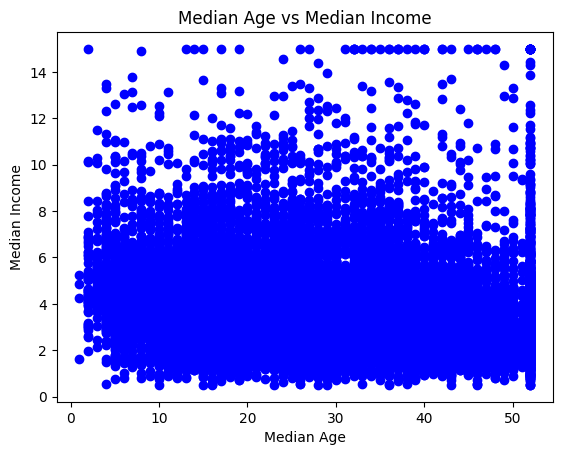

In [4]:
# d) plot regression lines and scatter plot between housing_median_age and
# median_income (you can choose your own figure size and color)
plt.scatter(data['housing_median_age'], data['median_income'], color='blue')
plt.title('Median Age vs Median Income')
plt.xlabel('Median Age')
plt.ylabel('Median Income')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

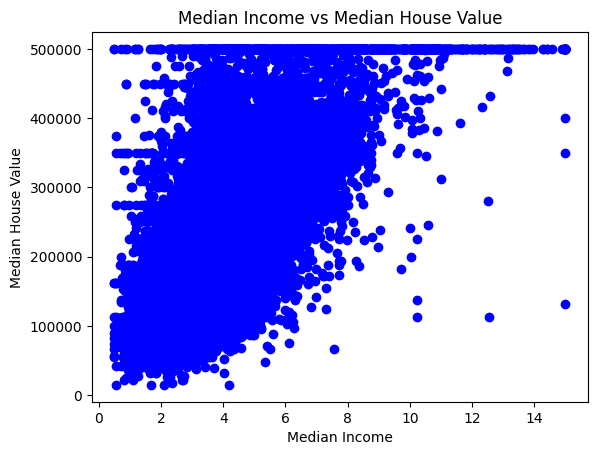

In [10]:
# e) plot regression lines and scatter plot between median_income and
# median_house_value (you can choose your own figure size and color)
plt.scatter(data['median_income'], data['median_house_value'], color='blue')
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show

In [15]:
# f) By taking input features as housing_median_age and median_income and
# target_variable as median_house_value, split data into training sets and
# testing sets. Take testing set as 25% of data and make random state equal to
# 42
X = data[['housing_median_age', 'median_income']]
Y = data['median_house_value']
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.25, random_state=42)


In [16]:
# g) Find the shape of the data
xTrain.shape

(15480, 2)

In [22]:
# h) Build a linear model, by implementing linear regression model
linearReg = LinearRegression().fit(xTrain, yTrain)

In [30]:
# i) Find the model intercept and model coefficient
print("Model intercept: ", linearReg.intercept_)
print("Independent variable (feature) coefficients: ", linearReg.coef_)

print("Model equation: ", linearReg.intercept_, " + ", linearReg.coef_[0], "*medAge + ", linearReg.coef_[1], "*medIncome + e") # e = random error term
# Note that there are additive (positive) effects from median income and median age.

Model intercept:  -9846.687795455538
Independent variable (feature) coefficients:  [ 1729.9109086  43166.45099003]
Model equation:  -9846.687795455538  +  1729.9109086045084 *medAge +  43166.45099002697 *medIncome + e


In [31]:
# j) predict the input testing data
yPred = linearReg.predict(xTest)

In [36]:
# k) Calculate MAE, MSE, and RSE.
mae = mean_absolute_error(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 60250.39247539562
Mean Squared Error: 6509192814.246537
Root Mean Squared Error: 80679.568753474


In [43]:
# l) From K, interpret how well the model fits the data
# We will fit a baseline linear model to compare our previous model.
# We will do this to get the null MAE, MSE, and RMSE

# Create Np array with same shape as yTest
yNull = np.zeros_like(yTest, dtype = float)

# Fill array with mean of yTest
yNull.fill(yTest.mean())

# Get null metrics
maeNull = mean_absolute_error(yTest, yNull)
mseNull = mean_squared_error(yTest, yNull)
rmseNull = np.sqrt(mseNull)

print("Baseline Mean Absolute Error:", maeNull)
print("Baseline Mean Squared Error:", mseNull)
print("Baseline Root Mean Squared Error:", rmseNull) # A lower MAE, MSE, and RMSE
# are desirable.

Baseline Mean Absolute Error: 90870.81042906076
Baseline Mean Squared Error: 13232181049.131168
Baseline Root Mean Squared Error: 115031.2177155887


In [52]:
# Do a side by side comparison of the baseline model and our prediction model
# Put MAE, MSE, RMSE, and their null counterparts into a table

def modelType(metric, null_metric): # this helper function tests which model is better
    if metric < null_metric:
        return "Prediction"
    else:
        return "Baseline"

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "MAE", "MSE", "RMSE"]
x.add_row(["Prediction", mae, mse, rmse])
x.add_row(["Baseline", maeNull, mseNull, rmseNull])
x.add_row(["Best model?", modelType(mae, maeNull), modelType(mse, mseNull), modelType(rmse, rmseNull)])
print(x)

+-------------+-------------------+--------------------+-------------------+
|    Model    |        MAE        |        MSE         |        RMSE       |
+-------------+-------------------+--------------------+-------------------+
|  Prediction | 60250.39247539562 | 6509192814.246537  |  80679.568753474  |
|   Baseline  | 90870.81042906076 | 13232181049.131168 | 115031.2177155887 |
| Best model? |     Prediction    |     Prediction     |     Prediction    |
+-------------+-------------------+--------------------+-------------------+


## **l) From k), interpret how well the model fits the data**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Without a comparison, the MAE, MSE, and RMSE do not provide us with very much information about the model fit. So, what we did was compute a baseline (or null) model from which we can compare our prediction model (which is the first model we constructed, before *part l*).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; With our baseline model, we computed the null MAE, MSE, and RMSE. Then, as shown in the above table, we tabulated these results for a side-by-side comparison with our prediction model's metrics. The table has a built-in logic that returns which is the better-performing model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; As we can see from the table, the prediction model performed better than the baseline model, and does an okay job at predicting **median_house_value**. The prediction model's **MAE = 60250.39 (null = 90870.81), MSE = 6509192814.25 (null = 13232181049.13), and RMSE = 80679.57 (null = 115031.22)**. All of these metrics are lower than their null/baseline counterparts, hence the model is performant, and the fit of the model on the data appears to be okay.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Though it's not required, we check a couple of other metrics that are useful for determining model fit with a residual plot, quantile-quantile plot, and r-squared.



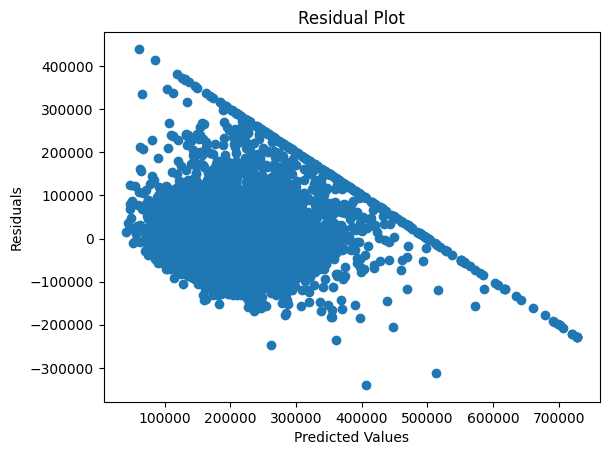

In [53]:
# Create a residual plot
plt.scatter(yPred, yTest - yPred)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Based on the residual plot, we observe that the residuals appear to be mostly randomly distributed on the left-hand side of the plot. However, there appears to be a non-random, negatively linear pattern to a number of residuals. This would warrant further investigation.

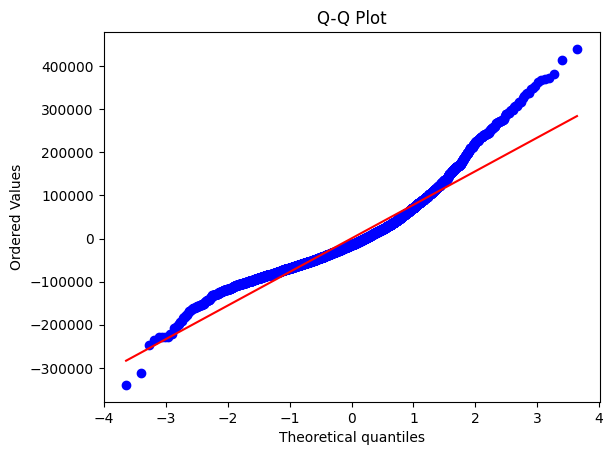

In [55]:
# Make a qqplot
import scipy.stats as stats
stats.probplot(yTest - yPred, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Based on the quantile-quantile plot (which we can use to visually check for a normal distribution of residuals), we see that there is a problematic curvature at the tails of the distribution. This indicates that the assumption of normally distributed residuals might be violated, and again warrants further investigation.

In [54]:
# Get r-squared
from sklearn.metrics import r2_score
r2 = r2_score(yTest, yPred)
print("R-squared:", r2)

R-squared: 0.5080786160589954


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; An r-squared of 0.508 implies that the independent variables (features) do a decent job at explaining the variation of the dependent (outcome) variable, and that the model fit is generally adequate (though it could be improved).